In [1]:
import sys
sys.path.append('/home/nextsim-workshop/data-nextsim-workshop2025/assimilation/NEDAS')
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import NEDAS
from NEDAS.config import Config
from NEDAS.schemes import get_analysis_scheme

In [2]:
c = Config(config_file="/home/nextsim-workshop/data-nextsim-workshop2025/assimilation/config.yml")

In [3]:
model = c.models['nextsim.dg']

In [4]:
scheme = get_analysis_scheme(c)

In [ ]:
scheme(c)

In [17]:
c.time = c.time_start
c.time = c.next_time
path = c.forecast_dir(c.time, 'nextsim.dg')
fld = model.read_var(path=path, time=c.time, name='seaice_conc', member=0)

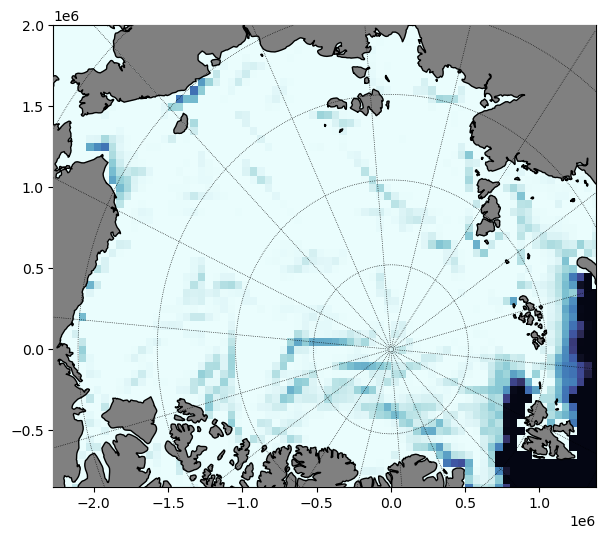

In [18]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
model.grid.plot_field(ax, fld, 0, 1, cmap=cmocean.cm.ice)
model.grid.plot_land(ax, color='gray')

In [7]:
c.debug=False
c.time = c.time_start

In [8]:
for i in range(8):
    scheme.preprocess(c)
    scheme.ensemble_forecast(c)
    c.time = c.next_time

Preprocessing nextsim.dg state:
using restart files in /home/nextsim-workshop/data-nextsim-workshop2025/assimilation/icbc
..................................................| 100% done.
Running nextsim.dg ensemble forecast:
..................................................| 100% done.
Preprocessing nextsim.dg state:
using restart files in /home/nextsim-workshop/data-nextsim-workshop2025/assimilation/cycle/201001010000/nextsim.dg
..................................................| 100% done.
Running nextsim.dg ensemble forecast:
..................................................| 100% done.
Preprocessing nextsim.dg state:
using restart files in /home/nextsim-workshop/data-nextsim-workshop2025/assimilation/cycle/201001020000/nextsim.dg
..................................................| 100% done.
Running nextsim.dg ensemble forecast:
..................................................| 100% done.
Preprocessing nextsim.dg state:
using restart files in /home/nextsim-workshop/data-nextsim-w

In [19]:
scheme.preprocess(c)

Preprocessing nextsim.dg state:
using restart files in /home/nextsim-workshop/data-assimilation-nextsimdg/cycle/201001010000/nextsim.dg
..................................................| 100% done.


In [7]:
scheme.ensemble_forecast(c)

Running nextsim.dg ensemble forecast:
..................................................| 100% done.


In [8]:
c.time = c.next_time
c.time

datetime.datetime(2010, 1, 3, 0, 0, tzinfo=datetime.timezone.utc)

In [3]:
import subprocess
import sys

In [ ]:
%tb
model.run(path='/home/nextsim-workshop/data-assimilation-nextsimdg/cycle/201001010000/nextsim.dg', 
          member=0, time=c.time, forecast_period=c.cycle_period, 
          time_start=c.time_start, time_end=c.time_end,
          debug=True, host='docker', run_separate_jobs=False, walltime=1800)

In [ ]:
c.time = c.time_start
for i in range(7):
    c.time = c.next_time
    scheme.diagnose(c)

In [18]:
c.time = c.next_time